In [17]:
%matplotlib notebook
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from astropy.table import Table
import fkplotlib

fkplotlib.use_txfonts()

kb = np.double(1.380650e-23)  # Boltzmann  [SI]
h = np.double(6.62607e-34)  # Planck     [SI]
c = np.double(2.99792e8)  #           [SI]
Tcmb = 2.725  # K
I0 = 2.0 * (kb * Tcmb) ** 3.0 / (h * c) ** 2.0 * 1.0e20  # MJy/sr

def g_tsz(nu):
    x = h * nu / (kb * Tcmb)
    return (
        x ** (4.0)
        * np.exp(x)
        / (np.exp(x) - 1.0) ** (2.0)
        * (x * ((np.exp(x) + 1) / (np.exp(x) - 1)) - 4.0)
    )

taus_pardo = readsav("atm_pardo_2017.save", python_dict=True)
bandpasses = {arr: Table.read("Transmission_2017_Jan_NIKA2_v1.fits", i+1) for i, arr in enumerate(["A1", "A3", "A2"])}

<IPython.core.display.Javascript object>


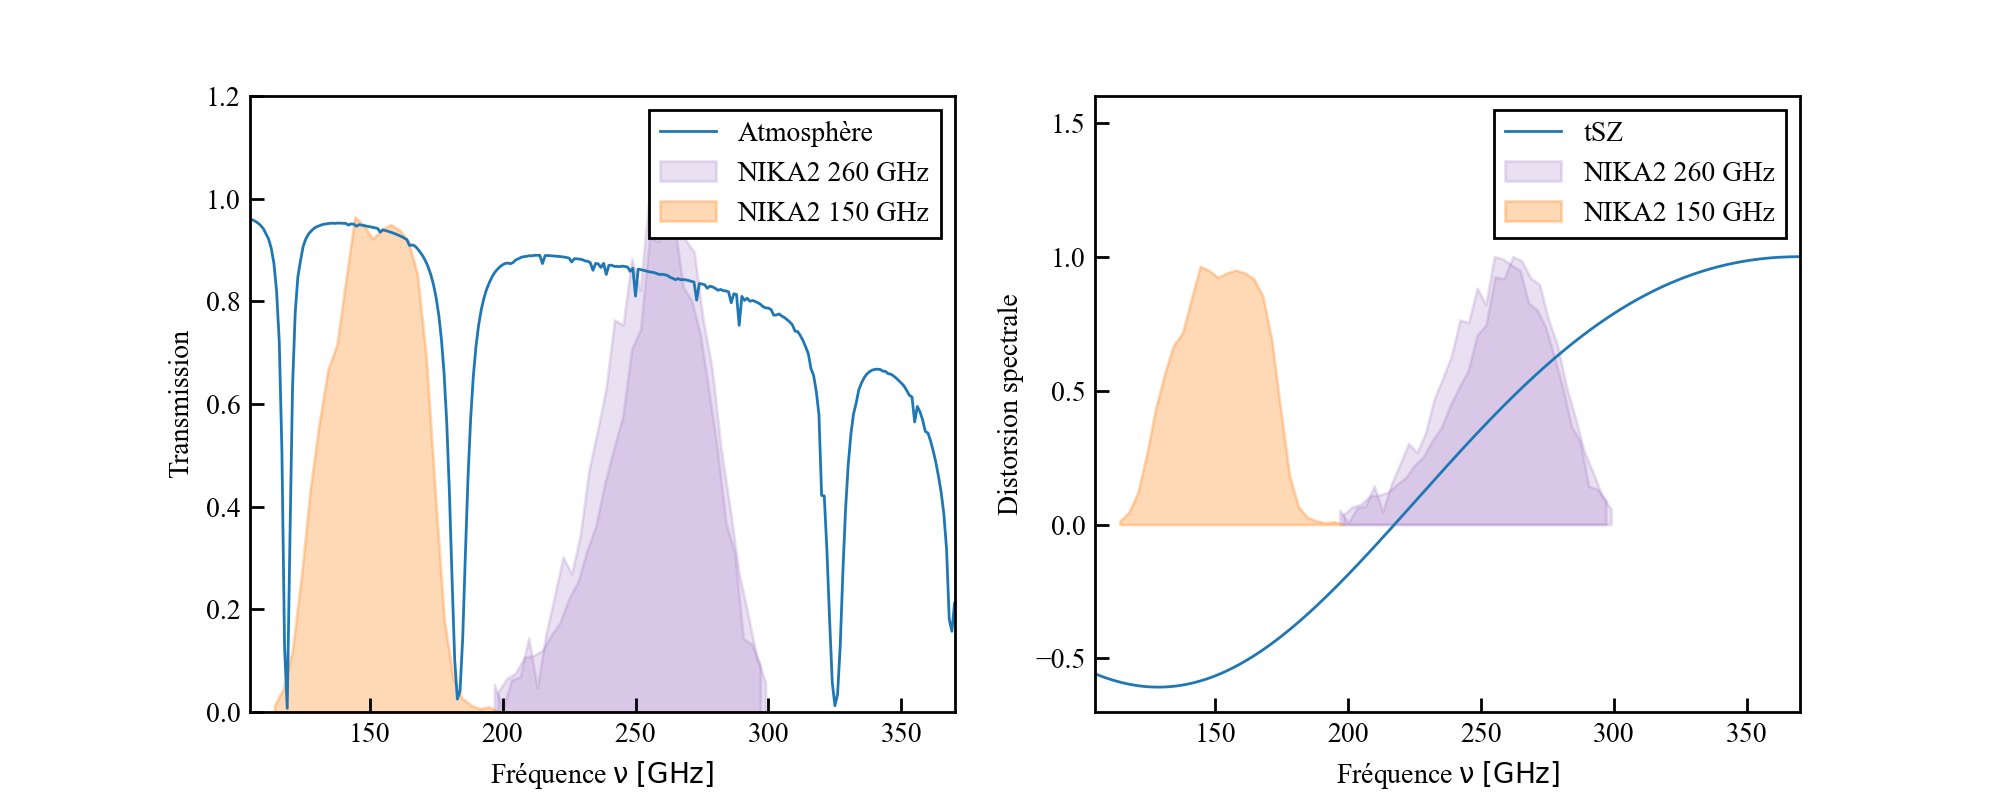

In [2]:
nus = taus_pardo["freqs"]

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
for ax in axs:
    for arr, bp in bandpasses.items():
        msk = bp["NIKATRANS"] != 0.0
        if arr == "A2":
            label = "NIKA2 150 GHz"
        elif arr == "A1":
            label = "NIKA2 260 GHz"
        else:
            label = None
        ax.fill_between(
            bp["FREQ"][msk], 0.0, bp["NIKATRANS"][msk], 
            color="tab:orange" if arr=="A2" else "tab:purple",
            alpha=0.3 if arr=="A2" else 0.2,
            label=label
        )

j = np.where(taus_pardo["pwv"] == 2)[0]
tr = np.exp(-taus_pardo["zopa"][:, j])
axs[0].plot(nus, tr, color="tab:blue", label="Atmosphère")
axs[0].set_ylim(0.0, 1.2)
axs[0].set_ylabel(r"Transmission")

axs[1].plot(nus, g_tsz(nus * 1e9) / np.max(g_tsz(nus * 1e9)), color="tab:blue", label="tSZ")
axs[1].set_ylim(-0.7, 1.6)
axs[1].set_ylabel(r"Distorsion spectrale")

for ax in axs:
    #fkplotlib.ax_bothticks(ax)
    fkplotlib.ax_legend(ax)
    ax.set_xlim(taus_pardo["freqs"][0], 370)
    ax.set_xlabel(r"Fréquence $\nu \;[{\rm GHz}]$")


#fig.savefig("bandpasses.pdf")

<IPython.core.display.Javascript object>


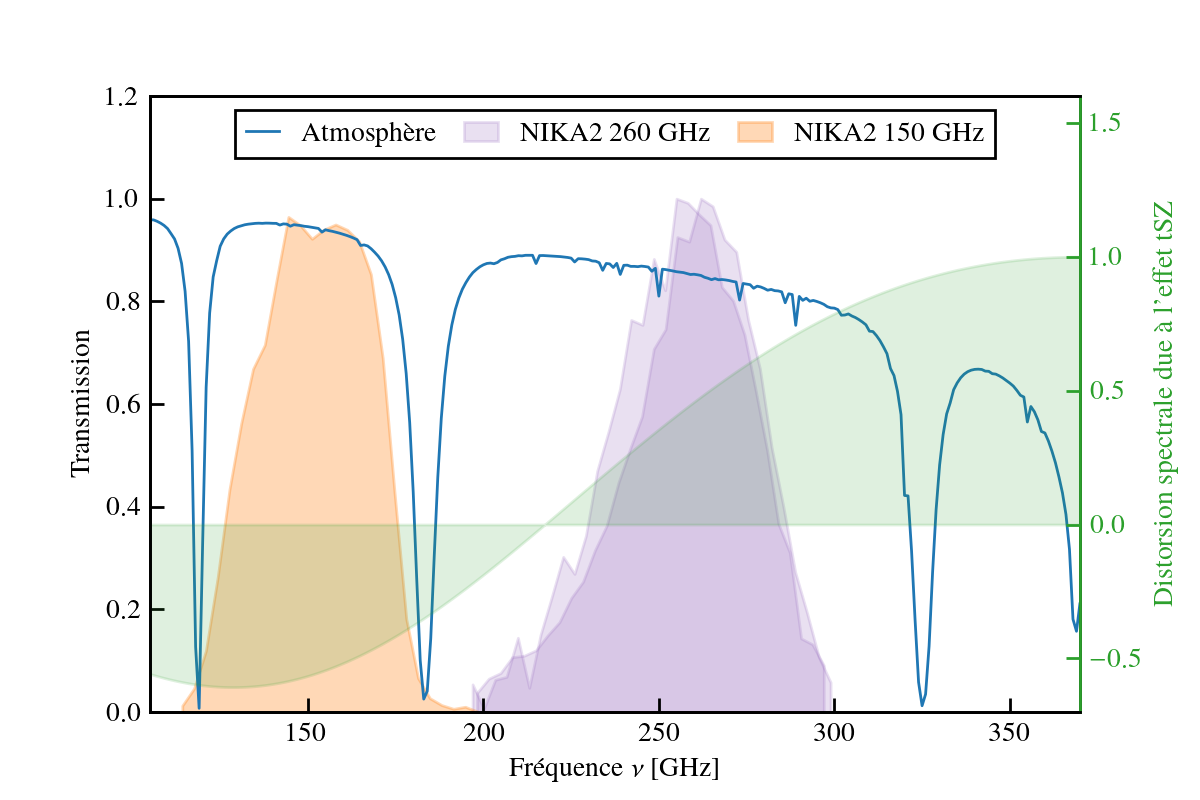

In [18]:
nus = taus_pardo["freqs"]

fig, ax = plt.subplots(figsize=(6, 4))
for arr, bp in bandpasses.items():
    msk = bp["NIKATRANS"] != 0.0
    if arr == "A2":
        label = "NIKA2 150 GHz"
    elif arr == "A1":
        label = "NIKA2 260 GHz"
    else:
        label = None
    ax.fill_between(
        bp["FREQ"][msk], 0.0, bp["NIKATRANS"][msk], 
        color="tab:orange" if arr=="A2" else "tab:purple",
        alpha=0.3 if arr=="A2" else 0.2,
        label=label
    )

j = np.where(taus_pardo["pwv"] == 2)[0]
tr = np.exp(-taus_pardo["zopa"][:, j])
ax.plot(nus, tr, color="tab:blue", label="Atmosphère")
ax.set_ylim(0.0, 1.2)
ax.set_ylabel(r"Transmission")

ax2 = ax.twinx()
ax2.fill_between(nus, 0.0, g_tsz(nus * 1e9) / np.max(g_tsz(nus * 1e9)), color="tab:green", label="tSZ", alpha=0.15)
ax2.set_ylim(-0.7, 1.6)
ax2.set_ylabel(r"Distorsion spectrale due à l'effet tSZ", color="tab:green")
ax2.spines["right"].set_color("tab:green")
ax2.tick_params(axis='y', colors='tab:green')

fkplotlib.ax_legend(ax, ncol=3, loc="upper center", handlelength=1.2, columnspacing=1.0)
ax.set_xlim(taus_pardo["freqs"][0], 370)
ax.set_xlabel(r"Fréquence $\nu \;[{\rm GHz}]$")


fig.savefig("bandpasses.pdf")